In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.ExcelFile('Data/Internet.xlsx')
data.sheet_names

['Totales Accesos Por Tecnología_',
 'Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [3]:
df_accesos_tecnologia = pd.read_excel('Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')

In [4]:
df_accesos_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [5]:
df_accesos_tecnologia.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

In [83]:
df_accesos_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,101294,5044557
1,2024,1,Capital Federal,70108,1177475,203756,4493,48879,1504711
2,2024,1,Catamarca,5901,11025,56542,1384,81,74933
3,2024,1,Chaco,11343,58929,64463,8404,12404,155543
4,2024,1,Chubut,26306,77217,26356,30867,9930,170676
...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
980,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
981,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
982,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


In [84]:
df_accesos_tecnologia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [85]:
(df_accesos_tecnologia == 0).sum()


Año              0
Trimestre        0
Provincia        0
ADSL             0
Cablemodem      14
Fibra óptica     9
Wireless        38
Otros            0
Total            0
dtype: int64

In [86]:
df_accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           984 non-null    object
 1   Trimestre     984 non-null    object
 2   Provincia     984 non-null    object
 3   ADSL          984 non-null    int64 
 4   Cablemodem    984 non-null    int64 
 5   Fibra óptica  984 non-null    int64 
 6   Wireless      984 non-null    int64 
 7   Otros         984 non-null    int64 
 8   Total         984 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 69.3+ KB


In [87]:
df_accesos_tecnologia.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,984.000000,9.840000e+02
mean,1.150317e+05,1.832892e+05,4.728246e+04,12385.282520,6556.766260,3.645454e+05
std,2.385989e+05,4.500403e+05,1.762796e+05,20996.226278,11567.922012,7.847271e+05
min,2.827000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.076400e+04,1.085600e+04,3.540000e+02,734.000000,332.000000,6.177975e+04
50%,4.452300e+04,4.014950e+04,2.581000e+03,5105.500000,1901.000000,1.124190e+05
75%,9.148125e+04,7.582350e+04,2.554050e+04,14034.750000,7546.500000,1.927940e+05
max,1.586343e+06,2.797700e+06,1.799013e+06,150290.000000,101294.000000,5.044557e+06


In [9]:
# Agrupar por 'Año' y 'Provincia' y sumar los valores de las columnas de acceso
df_accesos_tecnologia = df_accesos_tecnologia.groupby(['Año', 'Provincia']).sum().reset_index()

# Mostrar los resultados
df_accesos_tecnologia


,Año,Provincia,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,10,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,10,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,10,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,10,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,10,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0
...,...,...,...,...,...,...,...,...,...
283,2019 *,Santa Cruz,3 *2 *1 *,31987.0,31928.0,1730.0,19572.0,8208.0,93425.0
284,2019 *,Santa Fe,3 *2 *1 *,984854.0,1072655.0,52547.0,69464.0,61976.0,2241496.0
285,2019 *,Santiago Del Estero,3 *2 *1 *,74286.0,197528.0,461.0,8365.0,69099.0,349739.0
286,2019 *,Tierra Del Fuego,3 *2 *1 *,59369.0,75735.0,2925.0,0.0,4459.0,142488.0


In [10]:
df_accesos_tecnologia

,Año,Provincia,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,10,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,10,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,10,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,10,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,10,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0
...,...,...,...,...,...,...,...,...,...
283,2019 *,Santa Cruz,3 *2 *1 *,31987.0,31928.0,1730.0,19572.0,8208.0,93425.0
284,2019 *,Santa Fe,3 *2 *1 *,984854.0,1072655.0,52547.0,69464.0,61976.0,2241496.0
285,2019 *,Santiago Del Estero,3 *2 *1 *,74286.0,197528.0,461.0,8365.0,69099.0,349739.0
286,2019 *,Tierra Del Fuego,3 *2 *1 *,59369.0,75735.0,2925.0,0.0,4459.0,142488.0


In [11]:
df_accesos_tecnologia = df_accesos_tecnologia.drop(columns='Trimestre')

In [12]:
df_accesos_tecnologia

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0
...,...,...,...,...,...,...,...,...
283,2019 *,Santa Cruz,31987.0,31928.0,1730.0,19572.0,8208.0,93425.0
284,2019 *,Santa Fe,984854.0,1072655.0,52547.0,69464.0,61976.0,2241496.0
285,2019 *,Santiago Del Estero,74286.0,197528.0,461.0,8365.0,69099.0,349739.0
286,2019 *,Tierra Del Fuego,59369.0,75735.0,2925.0,0.0,4459.0,142488.0


In [13]:
df_accesos_tecnologia['Año'] = df_accesos_tecnologia['Año'].replace('2019 *', '2019')

In [14]:
df_accesos_tecnologia

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0
...,...,...,...,...,...,...,...,...
283,2019,Santa Cruz,31987.0,31928.0,1730.0,19572.0,8208.0,93425.0
284,2019,Santa Fe,984854.0,1072655.0,52547.0,69464.0,61976.0,2241496.0
285,2019,Santiago Del Estero,74286.0,197528.0,461.0,8365.0,69099.0,349739.0
286,2019,Tierra Del Fuego,59369.0,75735.0,2925.0,0.0,4459.0,142488.0


In [15]:
# Agrupar por año y sumar los accesos de cada tecnología
df_tecnologia_anual = df_accesos_tecnologia.groupby('Año').sum().reset_index()

# Mostrar el DataFrame agrupado
print(df_tecnologia_anual)


     Año                                          Provincia        ADSL  \
0   2014  Buenos AiresCapital FederalCatamarcaChacoChubu...  14884750.0   
1   2015  Buenos AiresCapital FederalCatamarcaChacoChubu...  15115694.0   
2   2016  Buenos AiresCapital FederalCatamarcaChacoChubu...  15073814.0   
3   2017  Buenos AiresCapital FederalCatamarcaChacoChubu...  14639302.0   
4   2018  Buenos AiresCapital FederalCatamarcaChacoChubu...  13981984.0   
5   2019  Buenos AiresCapital FederalCatamarcaChacoChubu...   2414575.0   
6   2020  Buenos AiresCapital FederalCatamarcaChacoChubu...   9072828.0   
7   2021  Buenos AiresCapital FederalCatamarcaChacoChubu...   7802044.0   
8   2022  Buenos AiresCapital FederalCatamarcaChacoChubu...   5712223.0   
9   2023  Buenos AiresCapital FederalCatamarcaChacoChubu...   3945211.0   
10  2024  Buenos AiresCapital FederalCatamarcaChacoChubu...    774475.0   
11  2019  Buenos AiresCapital FederalCatamarcaChacoChubu...   9774283.0   

    Cablemodem  Fibra óp

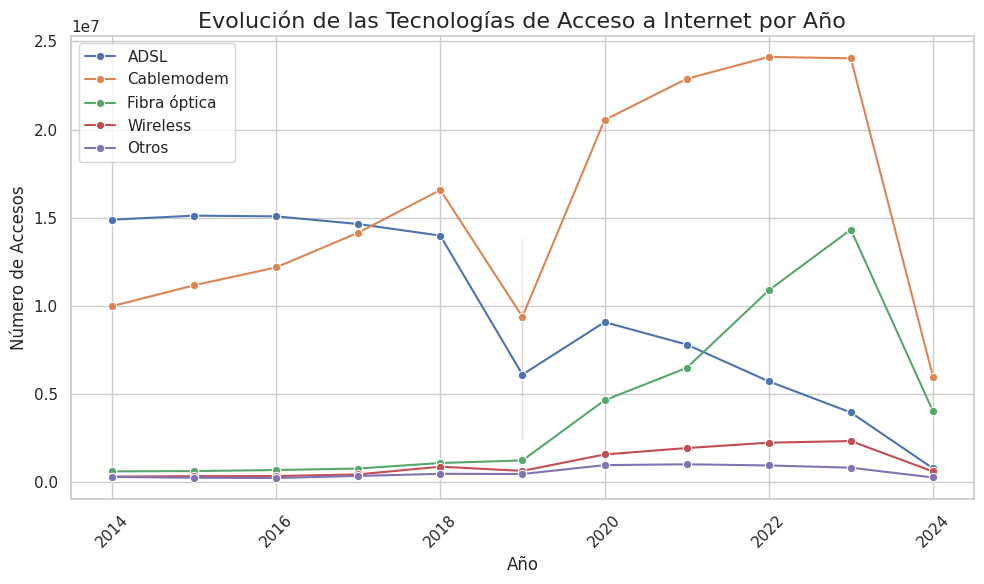

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Graficar cada tecnología
sns.lineplot(x='Año', y='ADSL', data=df_tecnologia_anual, label='ADSL', marker='o')
sns.lineplot(x='Año', y='Cablemodem', data=df_tecnologia_anual, label='Cablemodem', marker='o')
sns.lineplot(x='Año', y='Fibra óptica', data=df_tecnologia_anual, label='Fibra óptica', marker='o')
sns.lineplot(x='Año', y='Wireless', data=df_tecnologia_anual, label='Wireless', marker='o')
sns.lineplot(x='Año', y='Otros', data=df_tecnologia_anual, label='Otros', marker='o')

# Título y etiquetas
plt.title('Evolución de las Tecnologías de Acceso a Internet por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Accesos', fontsize=12)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.tight_layout()
plt.show()


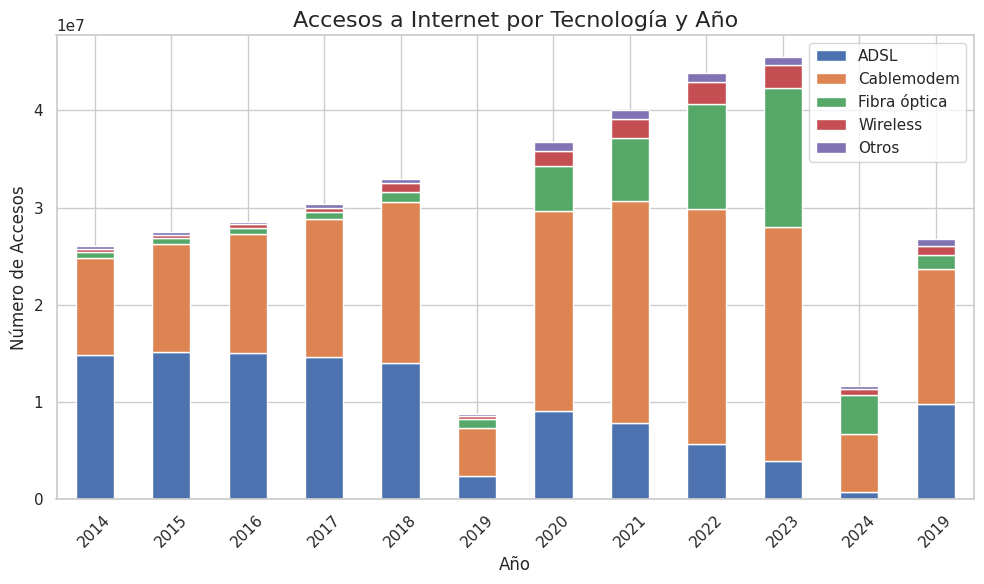

In [17]:
# Crear gráfico de barras apiladas
df_tecnologia_anual.set_index('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(
    kind='bar', stacked=True, figsize=(10, 6))

# Título y etiquetas
plt.title('Accesos a Internet por Tecnología y Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Accesos', fontsize=12)

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


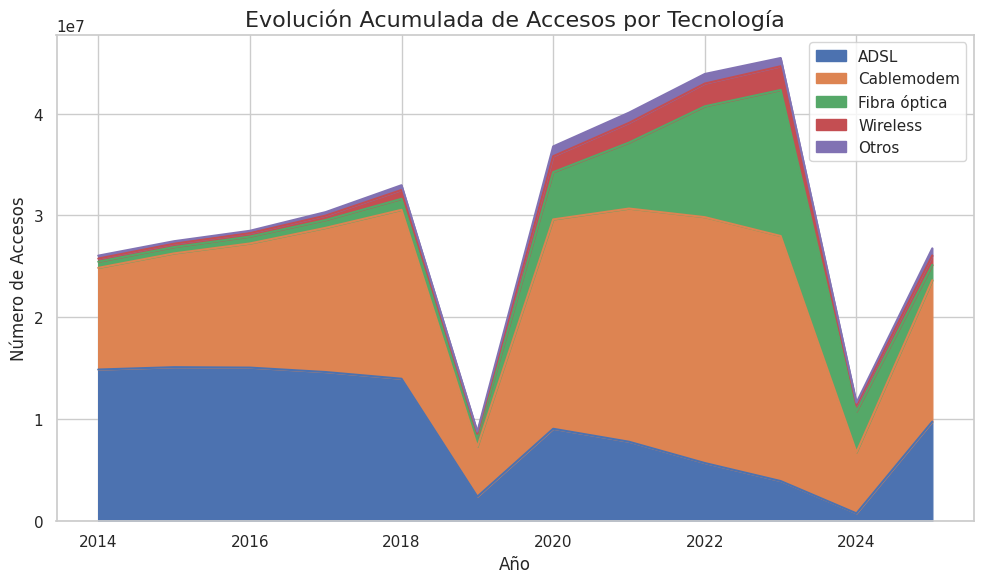

In [18]:
# Gráfico de áreas
df_tecnologia_anual.set_index('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(
    kind='area', stacked=True, figsize=(10, 6))

# Título y etiquetas
plt.title('Evolución Acumulada de Accesos por Tecnología', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Accesos', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [20]:
# Filtrar datos del año más reciente
df_reciente = df_tecnologia_anual[df_tecnologia_anual['Año'] == df_tecnologia_anual['Año'].max()]

# Crear gráfico de torta
df_reciente[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].T.plot(
    kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8, 8), legend=False)

# Título
plt.title(f'Distribución de Accesos por Tecnología en el Año {df_tecnologia_anual["Año"].max()}', fontsize=16)
plt.ylabel('')
plt.show()


TypeError: '>=' not supported between instances of 'int' and 'str'

# VERIFICAR LOS TIPOS DE VALORES; LOS TIPOS DE DATOS; LOS NULOS ETC

In [21]:
# Agrupar los datos por 'Año' y 'Provincia' y sumar los accesos por tecnología
df_agrupado = df_accesos_tecnologia.groupby(['Año', 'Provincia'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index()


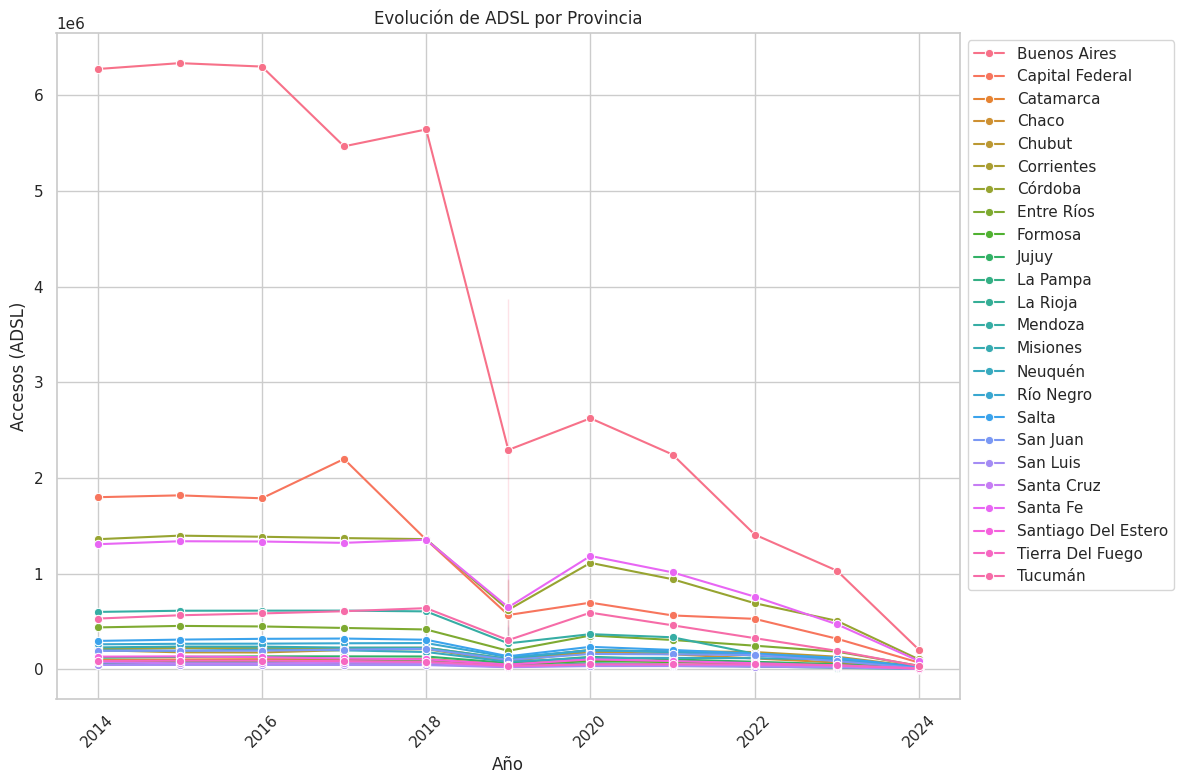

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir una tecnología, por ejemplo, 'ADSL'
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_agrupado, x='Año', y='ADSL', hue='Provincia', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de ADSL por Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos (ADSL)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [23]:
# Agrupar los datos por 'Año' y 'Provincia' y sumar los accesos por tecnología
df_agrupado = df_accesos_tecnologia.groupby(['Año', 'Provincia'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index()


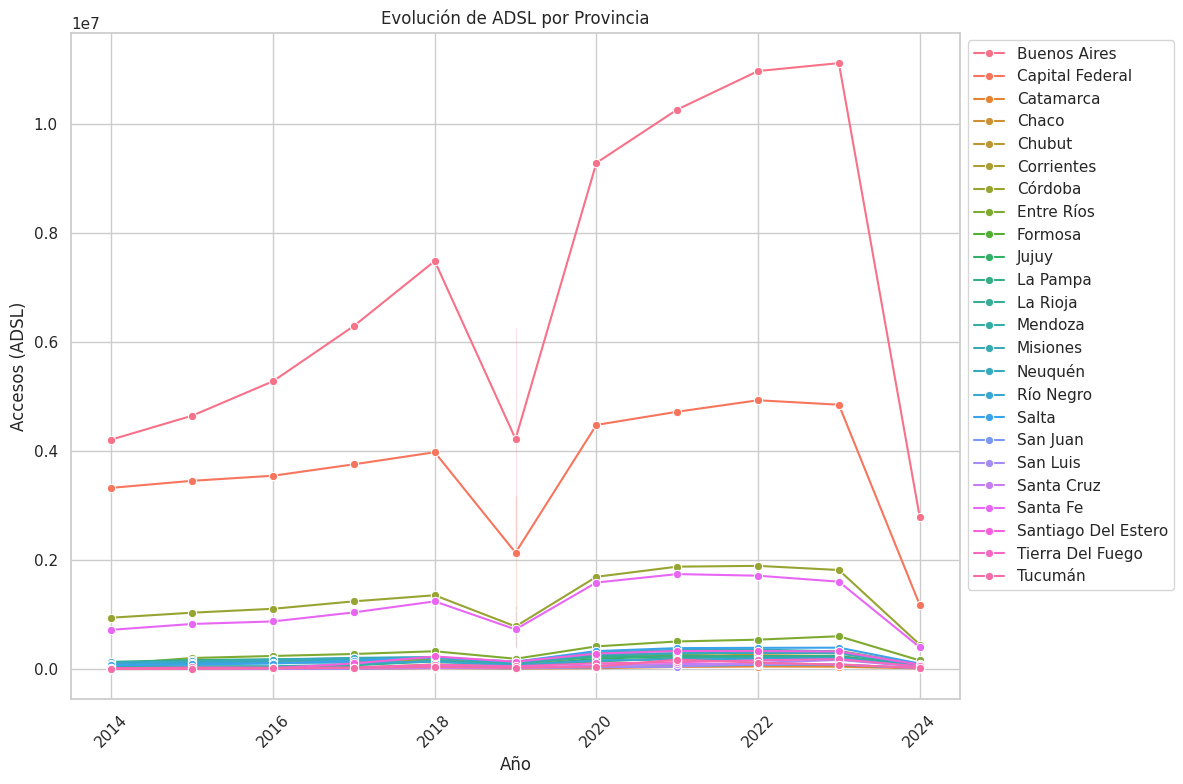

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir una tecnología, por ejemplo, 'ADSL'
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_agrupado, x='Año', y='Cablemodem', hue='Provincia', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de ADSL por Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos (ADSL)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Elegir una tecnología, por ejemplo, 'ADSL'
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_agrupado, x='Año', y='ADSL', hue='Provincia', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de ADSL por Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos (ADSL)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

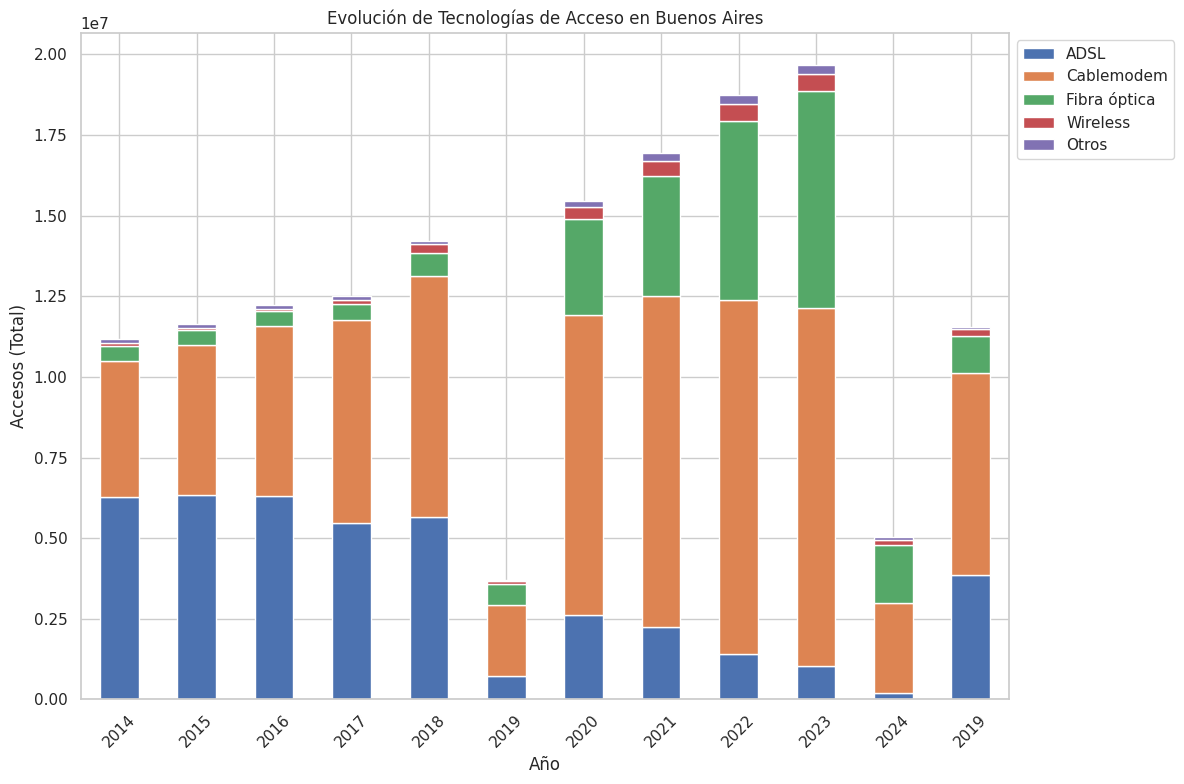

In [25]:
# Filtrar por una provincia específica (por ejemplo, Buenos Aires)
provincia = "Buenos Aires"
df_provincia = df_agrupado[df_agrupado['Provincia'] == provincia]

# Crear un gráfico de barras apiladas por año y tecnología
df_provincia.set_index('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir títulos y etiquetas
plt.title(f'Evolución de Tecnologías de Acceso en {provincia}')
plt.xlabel('Año')
plt.ylabel('Accesos (Total)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_486401/2071883717.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


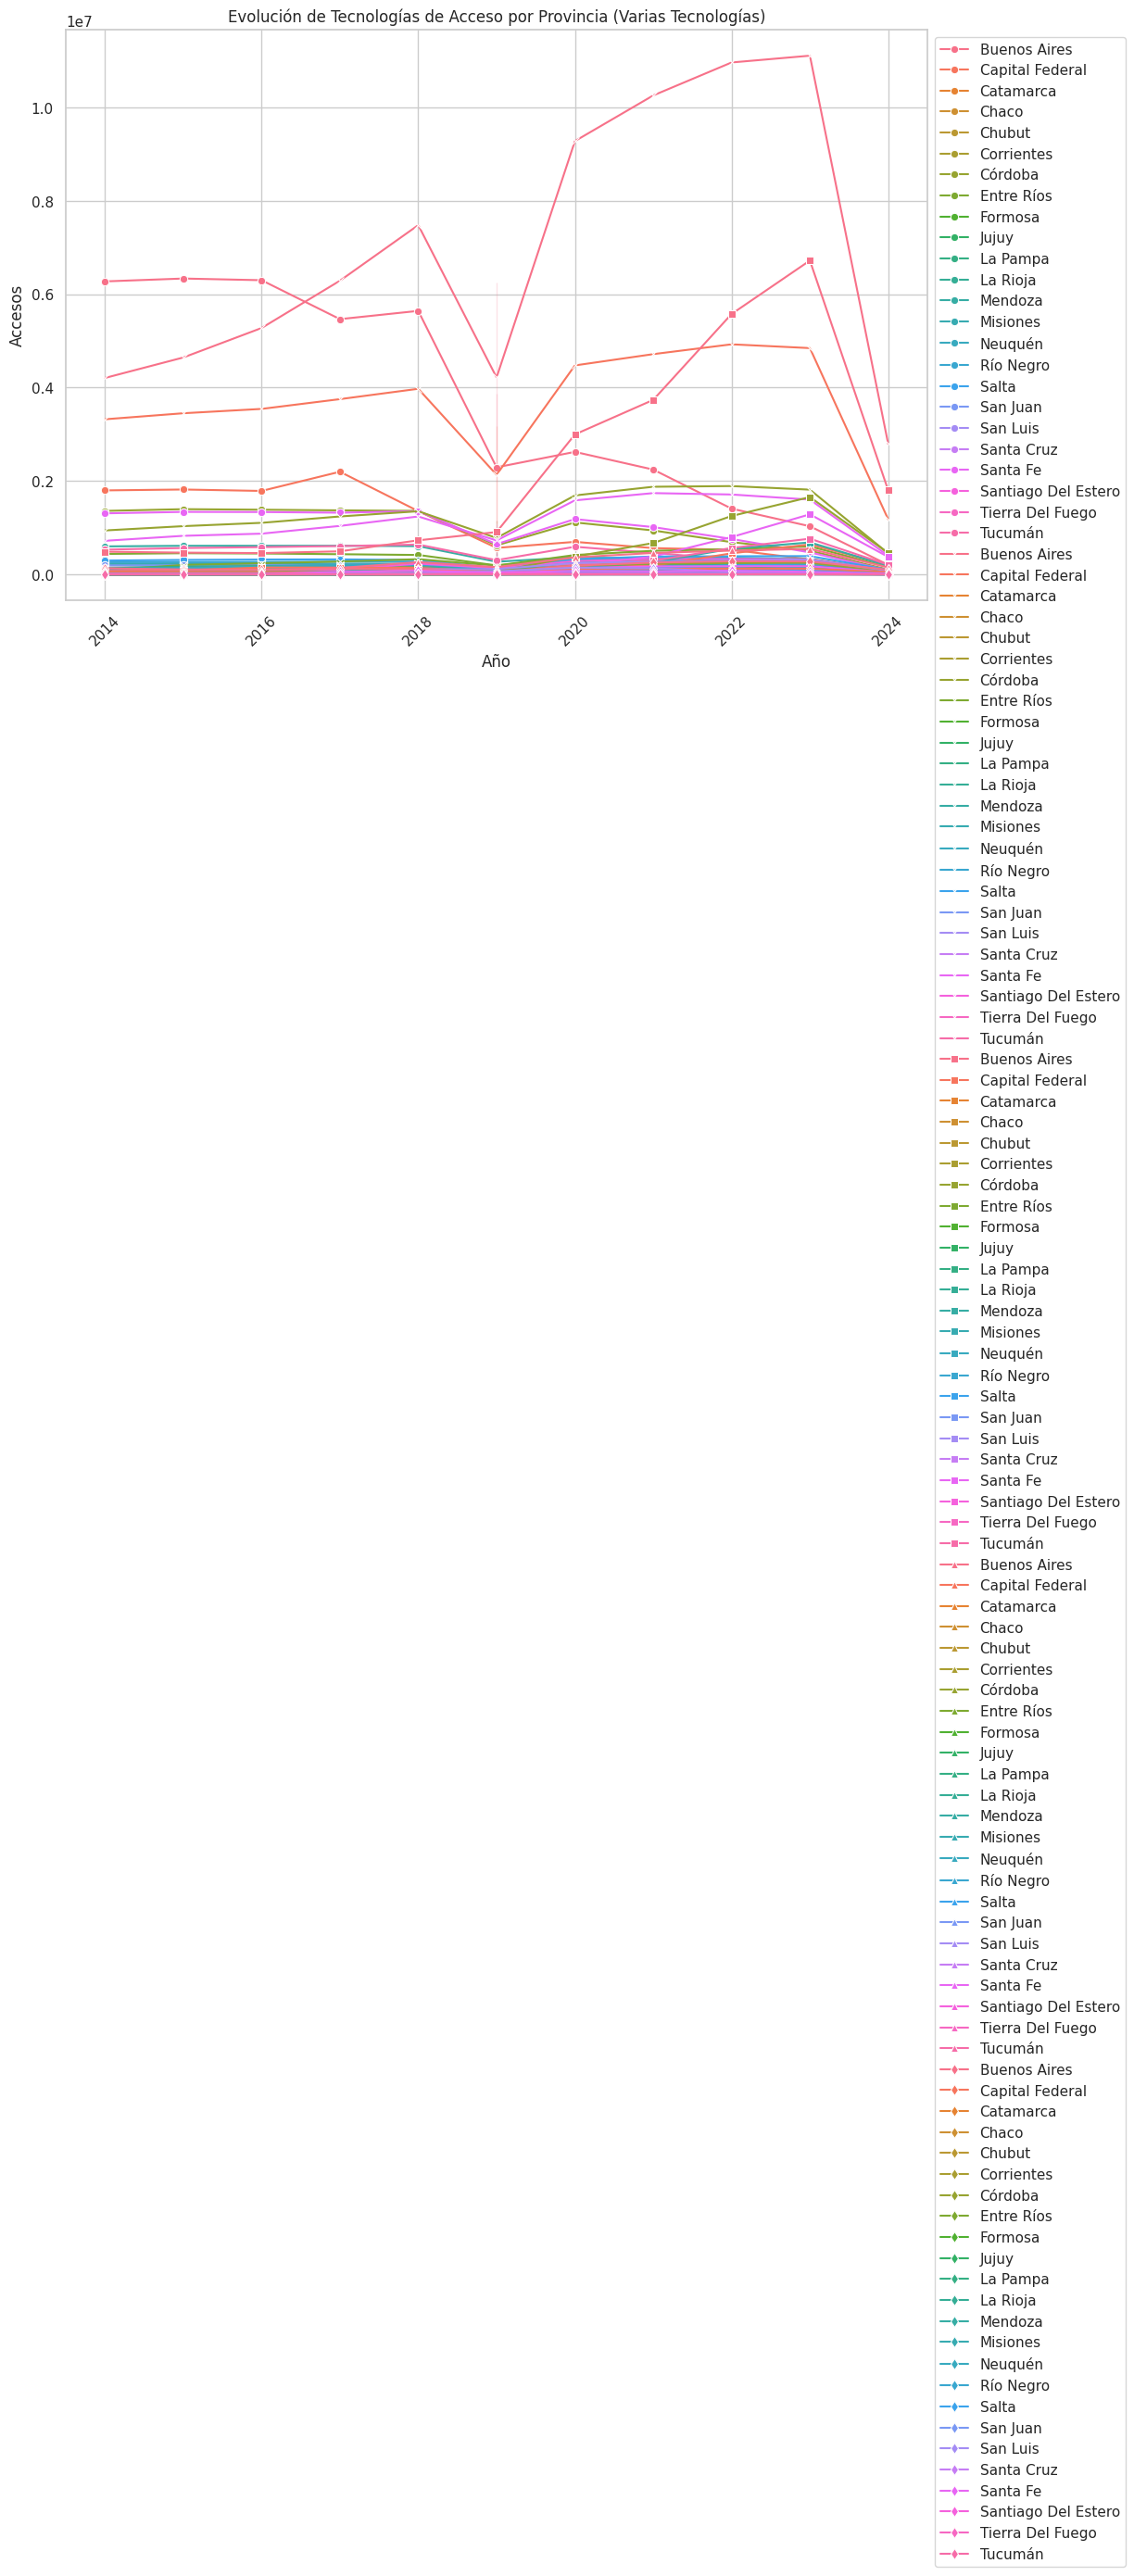

In [26]:
# Crear un gráfico de líneas para varias tecnologías a la vez
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_agrupado, x='Año', y='ADSL', hue='Provincia', marker='o')
sns.lineplot(data=df_agrupado, x='Año', y='Cablemodem', hue='Provincia', marker='x')
sns.lineplot(data=df_agrupado, x='Año', y='Fibra óptica', hue='Provincia', marker='s')
sns.lineplot(data=df_agrupado, x='Año', y='Wireless', hue='Provincia', marker='^')
sns.lineplot(data=df_agrupado, x='Año', y='Otros', hue='Provincia', marker='d')

# Añadir títulos y etiquetas
plt.title('Evolución de Tecnologías de Acceso por Provincia (Varias Tecnologías)')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [29]:
df_accesos_tecnologia.columns

Index(['Año', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total'],
      dtype='object')